In [1]:
import xarray as xr
import pandas as pd
import numpy as np
from cast_to_xarray import *
from saturation_ox import *
from extract_CTD_ox import *

# Load the CTD data

In [2]:
# would like to do all this in a loop

data_dir = 'data_cruise2'
fileend = '_loop_filter_teos10_bin.cnv'

cast6 = cast_to_xarray(data_dir+'/station6'+fileend, 'S6')
cast2 = cast_to_xarray(data_dir+'/station2'+fileend, 'S2')
cast7 = cast_to_xarray(data_dir+'/station7'+fileend, 'S7')
cast8 = cast_to_xarray(data_dir+'/station8'+fileend, 'S8')
cast9 = cast_to_xarray(data_dir+'/slope'+fileend, 'S9')
castRACE = cast_to_xarray(data_dir+'/race'+fileend, 'RACE')
castWF = cast_to_xarray(data_dir+'/WF'+fileend, 'WF')

# Calculate saturation oxygen, add to array
## absolute salinity and conservative temperature are also added

In [3]:
cast6 = saturation_ox(cast6)
cast2 = saturation_ox(cast2)
cast7 = saturation_ox(cast7)
cast8 = saturation_ox(cast8)
cast9 = saturation_ox(cast9)
castRACE = saturation_ox(castRACE)
castWF = saturation_ox(castWF)

#cast6

# Load the Winkler data

In [4]:
# load in the Winkler oxygen data
# problem: don't have info to match trip depth from seabird files
DO_winklerpd = pd.read_csv('../O2calib/Cruise2Winkler.csv')

# conver to xarray
DO_winkler = DO_winklerpd.set_index('Station').to_xarray()

# ** remember to upload Winkler oxygen data

# Extract CTD data at Winkler depths

In [101]:
extr6, sat6=extract_CTD(cast6, DO_winkler, '6')
extr2, sat2=extract_CTD(cast2, DO_winkler, '2')
extr7, sat7=extract_CTD(cast7, DO_winkler, '7')
extr8, sat8=extract_CTD(cast8, DO_winkler, '8')
extr9, sat9=extract_CTD(cast9, DO_winkler, '9')
extrRACE, satRACE=extract_CTD(castRACE, DO_winkler, 'RACE')
extrWF, satWF=extract_CTD(castWF, DO_winkler, 'WF')

# Calculate R squared

In [102]:
# needed to concatenate list in same order as Winkler
extr_all=extrRACE+extr6+extr7+extr8+extrWF+extr9+extr2

correlation_matrix = np.corrcoef(DO_winkler.Oxygen.values, extr_all)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print(r_squared)

0.8644109439986637


# Plot oxygen
## color by depth
## add saturation concentration

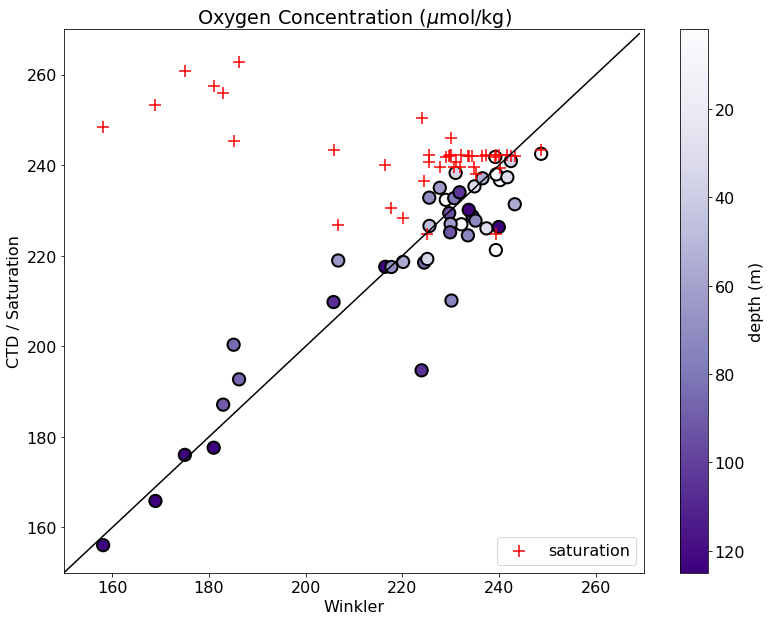

In [106]:
plt.figure(figsize=(13,10))
plt.rcParams.update({'font.size': 16})

datamin = 150
datamax = 270

x=np.arange(datamin, datamax, 1)
plt.plot(x, x, c='k')

plt.scatter(DO_winkler.sel(Station='RACE').Oxygen.values, extrRACE, marker='o', s=150, linewidths=2,
            c=DO_winkler.sel(Station='RACE').Depth.values, cmap=plt.cm.Purples, edgecolors='k')
plt.scatter(DO_winkler.sel(Station='WF').Oxygen.values, extrWF, marker='o', s=150, linewidths=2,
            c=DO_winkler.sel(Station='WF').Depth.values, cmap=plt.cm.Purples, edgecolors='k')
plt.scatter(DO_winkler.sel(Station='2').Oxygen.values, extr2, marker='o', s=150, linewidths=2,
            c=DO_winkler.sel(Station='2').Depth.values, cmap=plt.cm.Purples, edgecolors='k')
plt.scatter(DO_winkler.sel(Station='6').Oxygen.values, extr6, marker='o', s=150, linewidths=2,
            c=DO_winkler.sel(Station='6').Depth.values, cmap=plt.cm.Purples, edgecolors='k')
plt.scatter(DO_winkler.sel(Station='7').Oxygen.values, extr7, marker='o', s=150, linewidths=2,
            c=DO_winkler.sel(Station='7').Depth.values, cmap=plt.cm.Purples, edgecolors='k')
plt.scatter(DO_winkler.sel(Station='8').Oxygen.values, extr8, marker='o', s=150, linewidths=2,
            c=DO_winkler.sel(Station='8').Depth.values, cmap=plt.cm.Purples, edgecolors='k')
plt.scatter(DO_winkler.sel(Station='9').Oxygen.values, extr9, marker='o', s=150, linewidths=2,
            c=DO_winkler.sel(Station='9').Depth.values, cmap=plt.cm.Purples, edgecolors='k')
cbar=plt.colorbar()
cbar.set_label('depth (m)')
cbar.ax.invert_yaxis()

# add the saturation concentrations
plt.scatter(DO_winkler.sel(Station='RACE').Oxygen.values, satRACE, marker='+', s=150, linewidths=2,
            c='r', edgecolors='k', label='saturation')
plt.scatter(DO_winkler.sel(Station='WF').Oxygen.values, satWF, marker='+', s=150, linewidths=2,
            c='r', edgecolors='k')
plt.scatter(DO_winkler.sel(Station='2').Oxygen.values, sat2, marker='+', s=150, linewidths=2,
            c='r', edgecolors='k')
plt.scatter(DO_winkler.sel(Station='6').Oxygen.values, sat6, marker='+', s=150, linewidths=2,
            c='r', edgecolors='k')
plt.scatter(DO_winkler.sel(Station='7').Oxygen.values, sat7, marker='+', s=150, linewidths=2,
            c='r', edgecolors='k')
plt.scatter(DO_winkler.sel(Station='8').Oxygen.values, sat8, marker='+', s=150, linewidths=2,
            c='r', edgecolors='k')
plt.scatter(DO_winkler.sel(Station='9').Oxygen.values, sat9, marker='+', s=150, linewidths=2,
            c='r', edgecolors='k')

plt.xlim([datamin, datamax])
plt.ylim([datamin, datamax])

plt.xlabel('Winkler')
plt.ylabel('CTD / Saturation')

plt.legend(loc=4)

#plt.title('Oxygen concentration $\mu mol/kg')
#plt.title(r'$\alpha > \beta$')
plt.title(r'Oxygen Concentration ($\mu$mol/kg)')

plt.savefig('Figures/O2_QC_sat_cruise2.png')